### Project #1

Perform the following steps:

1. Understand the dataset:

Identify the shape of the dataset

Identify variables with null values

2. Perform basic data exploratory analysis:

Utilize missing value treatment

Analyze the date column and remove the entries if it has an incorrect timeline

Draw a frequency plot for city-wise complaints

Draw scatter and hexbin plots for complaint concentration across Brooklyn

3. Find major types of complaints:

Plot a bar graph of count vs. complaint types

Find the top 10 types of complaints

Display the types of complaints in each city in a separate dataset

 

4. Visualize the major types of complaints in each city

5. Check if the average response time across various types of complaints

6. Identify significant variables by performing a statistical analysis using p-values and chi-square values (Optional)

In [1]:
#importing the librabry
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sna
import zipfile


In [2]:
# reading the zip file using zipfile library
df=pd.read_csv('Project_Two_Dataset.zip',compression='zip')

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Identify the shape of the dataset
df.shape

(364558, 53)

In [4]:
columns=df.columns


In [7]:
columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [8]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [9]:
df.tail()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
364553,29609918,01/01/2015 12:04:44 AM,01/01/2015 10:22:31 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11421.0,84-25 85 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.695145,-73.860949,"(40.69514470265117, -73.86094888534394)"
364554,29608392,01/01/2015 12:04:28 AM,01/01/2015 02:25:02 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10468.0,2555 SEDGWICK AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.867830,-73.907178,"(40.86782963689454, -73.90717786644662)"
364555,29607589,01/01/2015 12:01:30 AM,01/01/2015 12:20:33 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,508 WEST 139 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.821647,-73.950873,"(40.821646626438095, -73.95087342885292)"
364556,29610889,01/01/2015 12:01:29 AM,01/01/2015 02:42:22 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10466.0,931 EAST 226 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.886361,-73.853290,"(40.88636077906953, -73.85329048666742)"
364557,29611816,01/01/2015 12:00:50 AM,01/01/2015 02:47:50 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11420.0,123-19 135 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.674212,-73.803585,"(40.674211762243935, -73.80358548685278)"


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      364558 non-null  int64  
 1   Created Date                    364558 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency Name                     364558 non-null  object 
 5   Complaint Type                  364558 non-null  object 
 6   Descriptor                      358057 non-null  object 
 7   Location Type                   364425 non-null  object 
 8   Incident Zip                    361560 non-null  float64
 9   Incident Address                312859 non-null  object 
 10  Street Name                     312859 non-null  object 
 11  Cross Street 1                  307370 non-null  object 
 12  Cross Street 2  

In [11]:
df.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.645580e+05,361560.000000,3.605280e+05,360528.000000,0.0,0.0,0.0,0.0,0.0,360528.000000,360528.000000
mean,3.106595e+07,10858.496659,1.005043e+06,203425.305782,NaN,NaN,NaN,NaN,NaN,40.724980,-73.924946
std,7.331531e+05,578.263114,2.196362e+04,29842.192857,NaN,NaN,NaN,NaN,NaN,0.081907,0.079213
min,2.960737e+07,83.000000,9.133570e+05,121185.000000,NaN,NaN,NaN,NaN,NaN,40.499040,-74.254937
25%,3.049938e+07,10314.000000,9.919460e+05,182945.000000,NaN,NaN,NaN,NaN,NaN,40.668742,-73.972253
50%,3.108795e+07,11209.000000,1.003470e+06,201023.000000,NaN,NaN,NaN,NaN,NaN,40.718406,-73.930643
75%,3.167433e+07,11238.000000,1.019134e+06,222790.000000,NaN,NaN,NaN,NaN,NaN,40.778166,-73.874098
max,3.231065e+07,11697.000000,1.067186e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700715


In [12]:
# a small function for looking into the unique values
#usually we can write like df['column'].unique or np.unique(df['column'])
df['Incident Zip'].unique()
def print_unique(df):
    for col in df:
        print("unique values for column:",col,"; No. of unique values:",len(df[col].unique()))
        print(df[col].unique())
        print("#"*150)
print_unique(df)

unique values for column: Unique Key ; No. of unique values: 364558
[32310363 32309934 32309159 ... 29607589 29610889 29611816]
######################################################################################################################################################
unique values for column: Created Date ; No. of unique values: 362018
['12/31/2015 11:59:45 PM' '12/31/2015 11:59:44 PM'
 '12/31/2015 11:59:29 PM' ... '01/01/2015 12:01:30 AM'
 '01/01/2015 12:01:29 AM' '01/01/2015 12:00:50 AM']
######################################################################################################################################################
unique values for column: Closed Date ; No. of unique values: 339838
['01/01/2016 12:55:15 AM' '01/01/2016 01:26:57 AM'
 '01/01/2016 04:51:03 AM' ... '01/01/2015 02:25:02 AM'
 '01/01/2015 12:20:33 AM' '01/01/2015 02:42:22 AM']
###################################################################################################################

In [13]:
# a small function for looking into the unique values
#usually we can write like df['column'].unique or np.unique(df['column'])
df['Incident Zip'].unique()
def print_unique(df):
    for col in df:
        print("unique values for column:",col,"; No. of unique values:",len(df[col].unique()))
        print(df[col].value_counts()) # counting how many unique values are there
        print("#"*150) 
print_unique(df)

unique values for column: Unique Key ; No. of unique values: 364558
31461374    1
31464022    1
31672892    1
31146557    1
30628414    1
           ..
31489957    1
30959526    1
30410666    1
31995820    1
31255012    1
Name: Unique Key, Length: 364558, dtype: int64
######################################################################################################################################################
unique values for column: Created Date ; No. of unique values: 362018
06/21/2015 04:41:03 PM    3
12/23/2015 06:33:50 PM    3
06/16/2015 10:24:30 PM    3
07/16/2015 07:21:55 AM    3
05/09/2015 09:32:57 PM    3
                         ..
03/18/2015 09:58:54 AM    1
05/09/2015 03:29:41 PM    1
09/27/2015 10:31:17 PM    1
05/28/2015 07:24:45 PM    1
11/04/2015 07:07:08 PM    1
Name: Created Date, Length: 362018, dtype: int64
######################################################################################################################################################
un

### Identify variables with null values


In [14]:
df.isnull()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364553,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
364554,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
364555,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
364556,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False


In [15]:
df.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

In [16]:
df.shape[0]

364558

In [17]:
(df.isnull().sum()/df.shape[0])*100

Unique Key                          0.000000
Created Date                        0.000000
Closed Date                         0.653120
Agency                              0.000000
Agency Name                         0.000000
Complaint Type                      0.000000
Descriptor                          1.783255
Location Type                       0.036483
Incident Zip                        0.822366
Incident Address                   14.181283
Street Name                        14.181283
Cross Street 1                     15.686941
Cross Street 2                     15.856187
Intersection Street 1              85.977540
Intersection Street 2              86.144317
Address Type                        0.892039
City                                0.822091
Landmark                           99.897136
Facility Type                       0.655314
Status                              0.000000
Due Date                            0.000823
Resolution Description              0.000000
Resolution

In [18]:
# columns with more than 80% nulls,these are the ones which we can drop directly
filter=(((df.isnull().sum()/df.shape[0])*100)>80)
df_to_delete=df.loc[: , filter.values]
delete_columns=list(df_to_delete.columns)

In [19]:
df_to_delete

,Intersection Street 1,Intersection Street 2,Landmark,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
delete_columns

['Intersection Street 1',
 'Intersection Street 2',
 'Landmark',
 'School or Citywide Complaint',
 'Vehicle Type',
 'Taxi Company Borough',
 'Taxi Pick Up Location',
 'Bridge Highway Name',
 'Bridge Highway Direction',
 'Road Ramp',
 'Bridge Highway Segment',
 'Garage Lot Name',
 'Ferry Direction',
 'Ferry Terminal Name']

In [21]:
# Identify variable with null values to be deleted
filter_=(((df.isnull().sum()/df.shape[0])*100)>0)
df_with_nulls=df.loc[: , filter_.values]
null_columns=list(df_with_nulls.columns)
null_columns

['Closed Date',
 'Descriptor',
 'Location Type',
 'Incident Zip',
 'Incident Address',
 'Street Name',
 'Cross Street 1',
 'Cross Street 2',
 'Intersection Street 1',
 'Intersection Street 2',
 'Address Type',
 'City',
 'Landmark',
 'Facility Type',
 'Due Date',
 'Resolution Action Updated Date',
 'X Coordinate (State Plane)',
 'Y Coordinate (State Plane)',
 'School Region',
 'School Code',
 'School Zip',
 'School or Citywide Complaint',
 'Vehicle Type',
 'Taxi Company Borough',
 'Taxi Pick Up Location',
 'Bridge Highway Name',
 'Bridge Highway Direction',
 'Road Ramp',
 'Bridge Highway Segment',
 'Garage Lot Name',
 'Ferry Direction',
 'Ferry Terminal Name',
 'Latitude',
 'Longitude',
 'Location']

In [22]:
# Dropping the 80% above null columns
df.drop(columns=delete_columns,inplace=True)


In [23]:
df.shape

(364558, 39)

###Perform basic data exploratory analysis:
Utilize missing value treatment

Analyze the date column and remove the entries if it has an incorrect timeline

Draw a frequency plot for city-wise complaints

Draw scatter and hexbin plots for complaint concentration across Brooklyn

###Utilize missing value treatment

In [24]:
(df.isnull().sum()/df.shape[0])*100

Unique Key                         0.000000
Created Date                       0.000000
Closed Date                        0.653120
Agency                             0.000000
Agency Name                        0.000000
Complaint Type                     0.000000
Descriptor                         1.783255
Location Type                      0.036483
Incident Zip                       0.822366
Incident Address                  14.181283
Street Name                       14.181283
Cross Street 1                    15.686941
Cross Street 2                    15.856187
Address Type                       0.892039
City                               0.822091
Facility Type                      0.655314
Status                             0.000000
Due Date                           0.000823
Resolution Description             0.000000
Resolution Action Updated Date     0.658880
Community Board                    0.000000
Borough                            0.000000
X Coordinate (State Plane)      

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      364558 non-null  int64  
 1   Created Date                    364558 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency Name                     364558 non-null  object 
 5   Complaint Type                  364558 non-null  object 
 6   Descriptor                      358057 non-null  object 
 7   Location Type                   364425 non-null  object 
 8   Incident Zip                    361560 non-null  float64
 9   Incident Address                312859 non-null  object 
 10  Street Name                     312859 non-null  object 
 11  Cross Street 1                  307370 non-null  object 
 12  Cross Street 2  

In [26]:
filter_1=(((df.isnull().sum()/df.shape[0])*100)>5)
#df.loc[: , filter_1.values] prints the all columns which are greater than 5 null values
df.loc[: , filter_1.values].columns
df.drop(columns=list(df.loc[: , filter_1.values].columns), inplace=True)

In [27]:
(df.isnull().sum()/df.shape[0])*100

Unique Key                        0.000000
Created Date                      0.000000
Closed Date                       0.653120
Agency                            0.000000
Agency Name                       0.000000
Complaint Type                    0.000000
Descriptor                        1.783255
Location Type                     0.036483
Incident Zip                      0.822366
Address Type                      0.892039
City                              0.822091
Facility Type                     0.655314
Status                            0.000000
Due Date                          0.000823
Resolution Description            0.000000
Resolution Action Updated Date    0.658880
Community Board                   0.000000
Borough                           0.000000
X Coordinate (State Plane)        1.105448
Y Coordinate (State Plane)        1.105448
Park Facility Name                0.000000
Park Borough                      0.000000
School Name                       0.000000
School Numb

In [28]:
df.shape

(364558, 35)

In [29]:
categorical_df=df.select_dtypes(exclude=np.number)
numerical_df=df.select_dtypes(include=np.number)

In [30]:
categorical_df.columns

Index(['Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Address Type', 'City',
       'Facility Type', 'Status', 'Due Date', 'Resolution Description',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'Location'],
      dtype='object')

In [31]:
(df[categorical_df.columns].isnull().sum()/df[categorical_df.columns].shape[0])*100

Created Date                      0.000000
Closed Date                       0.653120
Agency                            0.000000
Agency Name                       0.000000
Complaint Type                    0.000000
Descriptor                        1.783255
Location Type                     0.036483
Address Type                      0.892039
City                              0.822091
Facility Type                     0.655314
Status                            0.000000
Due Date                          0.000823
Resolution Description            0.000000
Resolution Action Updated Date    0.658880
Community Board                   0.000000
Borough                           0.000000
Park Facility Name                0.000000
Park Borough                      0.000000
School Name                       0.000000
School Number                     0.000000
School Region                     0.000274
School Code                       0.000274
School Phone Number               0.000000
School Addr

In [32]:
for cols in categorical_df.columns:
    df[cols].fillna(df[cols].mode()[0],inplace=True)

In [33]:
(df[categorical_df.columns].isnull().sum()/df[categorical_df.columns].shape[0])*100

Created Date                      0.0
Closed Date                       0.0
Agency                            0.0
Agency Name                       0.0
Complaint Type                    0.0
Descriptor                        0.0
Location Type                     0.0
Address Type                      0.0
City                              0.0
Facility Type                     0.0
Status                            0.0
Due Date                          0.0
Resolution Description            0.0
Resolution Action Updated Date    0.0
Community Board                   0.0
Borough                           0.0
Park Facility Name                0.0
Park Borough                      0.0
School Name                       0.0
School Number                     0.0
School Region                     0.0
School Code                       0.0
School Phone Number               0.0
School Address                    0.0
School City                       0.0
School State                      0.0
School Zip  

In [34]:
(df[numerical_df.columns].isnull().sum()/df[numerical_df.columns].shape[0])*100

Unique Key                    0.000000
Incident Zip                  0.822366
X Coordinate (State Plane)    1.105448
Y Coordinate (State Plane)    1.105448
Latitude                      1.105448
Longitude                     1.105448
dtype: float64

In [35]:
for cols in numerical_df.columns:
    df[cols].fillna(df[cols].mean(),inplace=True)

In [36]:
(df.isnull().sum()/df.shape[0])*100

Unique Key                        0.0
Created Date                      0.0
Closed Date                       0.0
Agency                            0.0
Agency Name                       0.0
Complaint Type                    0.0
Descriptor                        0.0
Location Type                     0.0
Incident Zip                      0.0
Address Type                      0.0
City                              0.0
Facility Type                     0.0
Status                            0.0
Due Date                          0.0
Resolution Description            0.0
Resolution Action Updated Date    0.0
Community Board                   0.0
Borough                           0.0
X Coordinate (State Plane)        0.0
Y Coordinate (State Plane)        0.0
Park Facility Name                0.0
Park Borough                      0.0
School Name                       0.0
School Number                     0.0
School Region                     0.0
School Code                       0.0
School Phone

###  Analyze the date column and remove the entries if it has an incorrect timeline

In [37]:
date_cols=['Created Date','Closed Date','Due Date']

In [38]:
df[date_cols]

,Created Date,Closed Date,Due Date
0,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,01/01/2016 07:59:45 AM
1,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,01/01/2016 07:59:44 AM
2,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,01/01/2016 07:59:29 AM
3,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,01/01/2016 07:57:46 AM
4,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,01/01/2016 07:56:58 AM
...,...,...,...
364553,01/01/2015 12:04:44 AM,01/01/2015 10:22:31 AM,01/01/2015 08:04:44 AM
364554,01/01/2015 12:04:28 AM,01/01/2015 02:25:02 AM,01/01/2015 08:04:28 AM
364555,01/01/2015 12:01:30 AM,01/01/2015 12:20:33 AM,01/01/2015 08:01:30 AM
364556,01/01/2015 12:01:29 AM,01/01/2015 02:42:22 AM,01/01/2015 08:01:29 AM


In [5]:
df['Created Date']=pd.to_datetime(df['Created Date'])
df['Closed Date']=pd.to_datetime(df['Closed Date'])
df['Due Date']=pd.to_datetime(df['Due Date'])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46953 entries, 8 to 364553
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unique Key                      46953 non-null  int64         
 1   Created Date                    46953 non-null  datetime64[ns]
 2   Closed Date                     44572 non-null  datetime64[ns]
 3   Agency                          46953 non-null  object        
 4   Agency Name                     46953 non-null  object        
 5   Complaint Type                  46953 non-null  object        
 6   Descriptor                      46126 non-null  object        
 7   Location Type                   46930 non-null  object        
 8   Incident Zip                    44355 non-null  float64       
 9   Incident Address                40968 non-null  object        
 10  Street Name                     40968 non-null  object        
 11  C

In [ ]:
df_bkp=df.copy()

In [ ]:
df

In [24]:
df[df['Created Date'] > df['Due Date']].index

Int64Index([], dtype='int64')

In [25]:

df.drop(df[df['Created Date'] > df['Due Date']].index,inplace = True)


In [26]:
df.shape

(46953, 53)

In [27]:
df_perfect=df.copy()

In [28]:
numerical_df.columns

NameError: name 'numerical_df' is not defined

In [29]:
df.drop(df[df['Created Date']>df['Closed Date']].index,inplace=True)

In [30]:
df.drop(df[df['Due Date']>df['Closed Date']].index,inplace=True)

In [31]:
df.shape

(46953, 53)

<AxesSubplot:title={'center':'Most common Complaints'}>

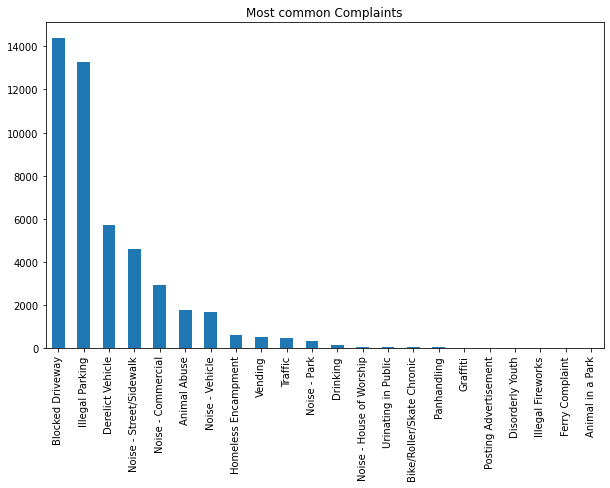

In [22]:
# Visualizing the complainant type graph
(df['Complaint Type'].value_counts()).head(25).plot(kind='bar',figsize=(10,6),title='Most common Complaints')

<AxesSubplot:title={'center':'Most common Complaints'}>

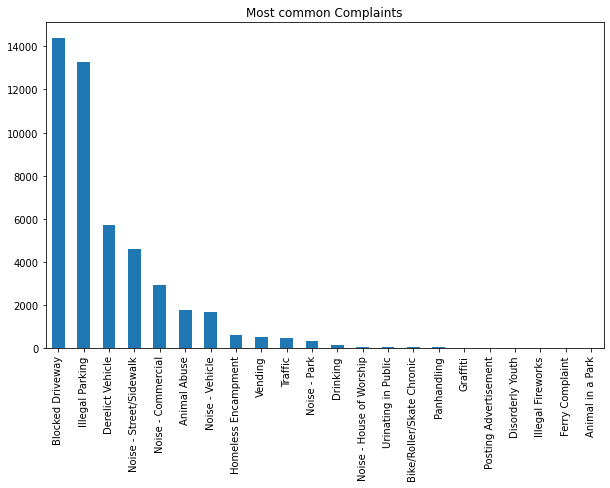

In [32]:
(df['Complaint Type'].value_counts()).tail(25).plot(kind='bar',figsize=(10,6),title='Most common Complaints')

### Draw a frequency plot for city-wise complaints

<AxesSubplot:title={'center':'Most common Complaints'}>

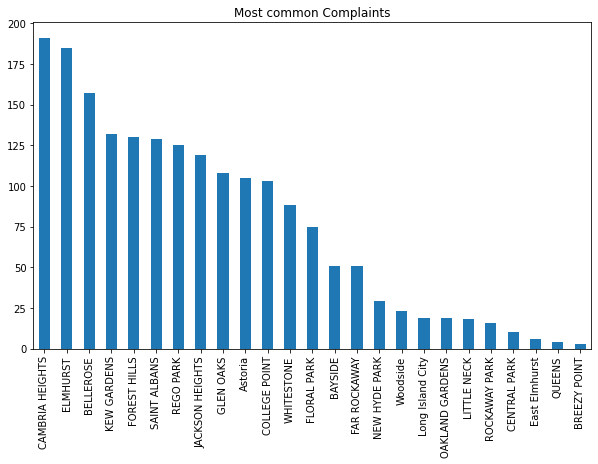

In [33]:
(df['City'].value_counts()).tail(25).plot(kind='bar',figsize=(10,6),title='Most common Complaints')

### Draw scatter and hexbin plots for complaint concentration across Brooklyn

In [34]:
df['Complaint Type'].value_counts()

Blocked Driveway             14394
Illegal Parking              13268
Derelict Vehicle              5724
Noise - Street/Sidewalk       4615
Noise - Commercial            2957
Animal Abuse                  1763
Noise - Vehicle               1711
Homeless Encampment            642
Vending                        526
Traffic                        499
Noise - Park                   366
Drinking                       136
Noise - House of Worship        82
Urinating in Public             63
Bike/Roller/Skate Chronic       61
Panhandling                     46
Graffiti                        34
Posting Advertisement           25
Disorderly Youth                23
Illegal Fireworks               15
Ferry Complaint                  2
Animal in a Park                 1
Name: Complaint Type, dtype: int64

(-74.28064686999934, -73.67309922236328, 40.48276254832783, 40.93330694343947)

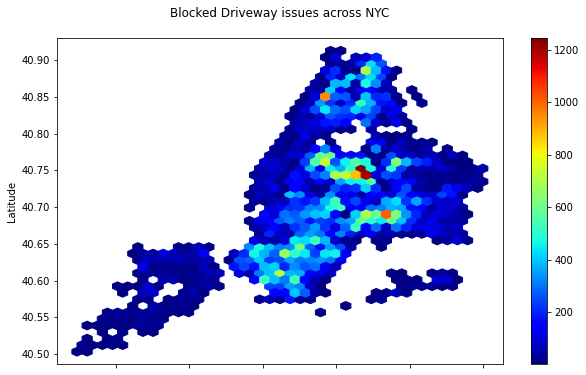

In [14]:
df_Blocked_Driveway = df_perfect[ df_perfect['Complaint Type']=='Blocked Driveway']
df_Blocked_Driveway.plot(kind='hexbin',x='Longitude',y='Latitude',gridsize=40,colormap='jet',mincnt=1,title='Blocked Driveway issues across NYC\n',figsize=(10,6)).axis('equal')

(-74.2780676983857, -73.6739707480351, 40.479289073149, 40.931053836998366)

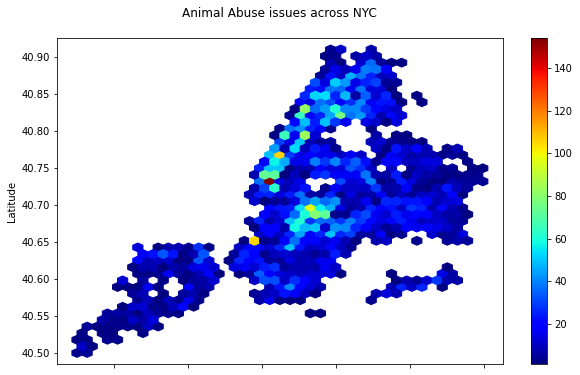

In [15]:
df_Animal_Abuse = df_perfect[ df_perfect['Complaint Type']=='Animal Abuse']
df_Animal_Abuse.plot(kind='hexbin',x='Longitude',y='Latitude',gridsize=40,colormap='jet',mincnt=1,title='Animal Abuse issues across NYC\n',figsize=(10,6)).axis('equal')

### Display the types of complaints in each city in a separate dataset

In [ ]:
df_perfect[df_perfect[" Borough "]].groupby([" Borough ","Complaint Type","Descriptor"]).size()